## Intro to information extraction from text

We have primarily focused on examining structured data, which is data that resembles a table or an Excel spreadsheet. However, not all data conforms to this structure. A common example of unstructured data is human-readable text. Businesses often seek to perform various tasks on text data, such as sentiment analysis, document summarization, document clustering, and document recommendation.

In this course, we will later learn how to extract text from webpages. For now, we can work with some pre-prepared text files.

Text analysis treats words as data instead of numbers, which involves tokenizing the text. Tokenization refers to splitting the text string of a document into individual words. This task is actually more challenging than it may seem. For instance, if we split the document text based on spaces, a phrase like "San Francisco" would be separated into two words. However, for our current purposes, this method will suffice. You can refer to Tokenization in this excellent information retrieval book for more detailed information.

The objective of this lecture-lab is to become familiar with text tokenization and the extraction of basic data, such as word frequency. To visualize the information extracted from a document, we will utilize word clouds. Word clouds highlight words based on their frequency.

## Tokenizing a document

Let's use an article on [Istanbul](https://github.com/yanneta/msds692/blob/master/data/IntroIstanbul.txt) as our text file and then figure out how to get an appropriate list of words out of it.

In [1]:
! head ../data/IntroIstanbul.txt


  
  
    
      
        The City and ITS People
        Istanbul is one of the worlds most venerable cities. Part
        of the citys allure is its setting, where Europe faces Asia acr­oss
        the winding turquoise waters of the Bosphorus, making it the only city
        in the world to bridge two continents.


Let's read the contents of such a file into a string and split it on the space character:

In [2]:
with open('../data/IntroIstanbul.txt', encoding='utf-8') as f:
    contents = f.read() # read all content of the file
words = contents.split()
print(words[:50])    # print first 25 words

['The', 'City', 'and', 'ITS', 'People', 'Istanbul', 'is', 'one', 'of', 'the', 'worlds', 'most', 'venerable', 'cities.', 'Part', 'of', 'the', 'citys', 'allure', 'is', 'its', 'setting,', 'where', 'Europe', 'faces', 'Asia', 'acr\xadoss', 'the', 'winding', 'turquoise', 'waters', 'of', 'the', 'Bosphorus,', 'making', 'it', 'the', 'only', 'city', 'in', 'the', 'world', 'to', 'bridge', 'two', 'continents.', 'Here,', 'where', 'the', 'waters']


In [5]:
print('acr\xadoss')

acr­oss


In [4]:
'acr\xadoss'

'acr\xadoss'

The list of words looks pretty good, although it is still not very clean.  We should also strip punctuation marks. Here's a way to do it using a filter pattern with a [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions).

In [6]:
import string
contents = [c for c in contents if c not in string.punctuation]
contents = ''.join(contents)
words = contents.split()
print(words[:50])

['The', 'City', 'and', 'ITS', 'People', 'Istanbul', 'is', 'one', 'of', 'the', 'worlds', 'most', 'venerable', 'cities', 'Part', 'of', 'the', 'citys', 'allure', 'is', 'its', 'setting', 'where', 'Europe', 'faces', 'Asia', 'acr\xadoss', 'the', 'winding', 'turquoise', 'waters', 'of', 'the', 'Bosphorus', 'making', 'it', 'the', 'only', 'city', 'in', 'the', 'world', 'to', 'bridge', 'two', 'continents', 'Here', 'where', 'the', 'waters']


Some of the words are capitalized.  What we need, is all words normalized so that `people` and `People` are consider the same word etc...

In [7]:
words = [w.lower() for w in words]
print(words[:50])

['the', 'city', 'and', 'its', 'people', 'istanbul', 'is', 'one', 'of', 'the', 'worlds', 'most', 'venerable', 'cities', 'part', 'of', 'the', 'citys', 'allure', 'is', 'its', 'setting', 'where', 'europe', 'faces', 'asia', 'acr\xadoss', 'the', 'winding', 'turquoise', 'waters', 'of', 'the', 'bosphorus', 'making', 'it', 'the', 'only', 'city', 'in', 'the', 'world', 'to', 'bridge', 'two', 'continents', 'here', 'where', 'the', 'waters']


That's not the best we can do. For example "faces" and "face" should be the same. Let's *stem* the words: 

In [8]:
! pip install -q -U nltk

In [9]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in words]
print(stemmed[:45])

['the', 'citi', 'and', 'it', 'peopl', 'istanbul', 'is', 'one', 'of', 'the', 'world', 'most', 'vener', 'citi', 'part', 'of', 'the', 'citi', 'allur', 'is', 'it', 'set', 'where', 'europ', 'face', 'asia', 'acr\xadoss', 'the', 'wind', 'turquois', 'water', 'of', 'the', 'bosphoru', 'make', 'it', 'the', 'onli', 'citi', 'in', 'the', 'world', 'to', 'bridg', 'two']


## Computing word frequencies

To create a bag-of-words representation, we can follow a process where we iterate through the words in a document and maintain a dictionary to store the count for each word. Here are the steps that we can follow:

1. Initialize an empty dictionary called 'wfreqs' to store word counts.
2. Iterate over each word 'w' in the 'words' collection.
3. If 'w' is not already a key in 'wfreqs', add it to the dictionary with an initial count of 1. Otherwise, increment the count for 'w' in 'wfreqs' by one.

By applying this approach, the resulting 'wfreqs' dictionary will contain the word frequencies, representing the count of each word encountered in the 'words' collection.

In [10]:
from collections import defaultdict

wfreqs = defaultdict(int) # missing entries yield value 0
for w in stemmed:
    wfreqs[w] += 1
print(wfreqs['ottoman'])
print(wfreqs['the'])

6
123


Computing the frequency of elements in a list is common enough that Python provides a built-in data structure called a `Counter` that will do this for us:

In [11]:
from collections import Counter
ctr = Counter(stemmed)
print(ctr['ottoman'])
print(ctr['the'])

6
123


That data structure is nice because it can give the list of, say, 10 most common words:

In [12]:
print(ctr.most_common(10))

[('the', 123), ('of', 55), ('and', 40), ('citi', 19), ('to', 19), ('in', 16), ('is', 15), ('a', 13), ('it', 10), ('istanbul', 9)]


### Exercise

Extract the most common 10 words from `ctr` (i.e., not the tuples).

In [13]:
print([p[0] for p in ctr.most_common(10)])

['the', 'of', 'and', 'citi', 'to', 'in', 'is', 'a', 'it', 'istanbul']


In [14]:
print([w for w,freq in ctr.most_common(10)])

['the', 'of', 'and', 'citi', 'to', 'in', 'is', 'a', 'it', 'istanbul']


In [15]:
list(dict(ctr.most_common(10)).keys())

['the', 'of', 'and', 'citi', 'to', 'in', 'is', 'a', 'it', 'istanbul']

## Word clouds

Python has a nice library called `wordcloud` (we have already used this in the SF Police data lab) and can again use to visualize the relative frequency of words. The key elements of the following code are the creation of the `WordCloud` and calling `fit_words()` with a dictionary (type `dict`) of word-freq associations, `wfreq`. Previously, we pulled data from a column in a spreadsheet, but now we are extracting it from a text file. The approach is exactly the same.

In [16]:
! pip install -q -U wordcloud

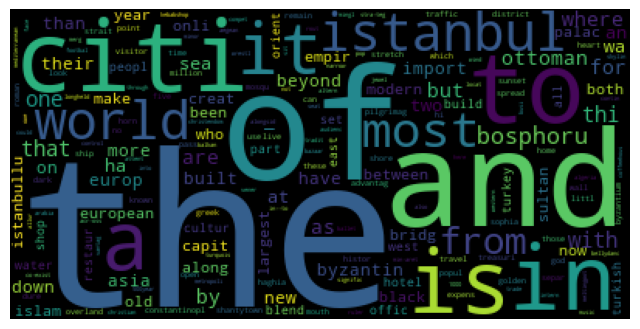

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud()
wordcloud.fit_words(ctr)

fig=plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

If the presence of all the words seems overwhelming, we can simplify the analysis by focusing on the top N words. To achieve this, we can utilize the `most_common()` function, which provides us with a list of tuples representing word-frequency pairs. Since the `fit_words()` function requires a dictionary as input, we can convert the list of the most common words into a dictionary. 

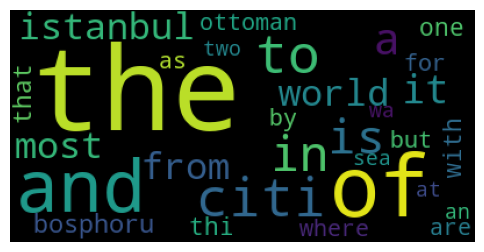

In [18]:
# Get 30 most common word-freq pairs then convert to dictionary for use by WordCloud
wtuples = ctr.most_common(30)
wdict = dict(wtuples)

wordcloud = WordCloud()
wordcloud.fit_words(wdict)

fig=plt.figure(figsize=(6, 4))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

That looks better but it looks like common English words like "the" and "of" are dominating the visualization. To focus on the words most relevant to the document, let's filter out such so-called English *stop words*. Nltk provides a nice list of stop words we can use:

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english')[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yinterian/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Exercise 

Filter out the English stop words from the `words` list we computed above and reset `wfreqs` to a `Counter` based off this filtered list.

In [20]:
contents = [c for c in contents if c not in string.punctuation]
contents = ''.join(contents)
words = contents.split()
words = [w.lower() for w in words]
goodwords = [w for w in words if w not in stopwords.words('english')]
goodctr = Counter(goodwords)
print(goodctr.most_common(10))

[('city', 13), ('istanbul', 8), ('bosphorus', 8), ('worlds', 7), ('one', 5), ('citys', 5), ('two', 5), ('ottoman', 5), ('europe', 4), ('asia', 4)]


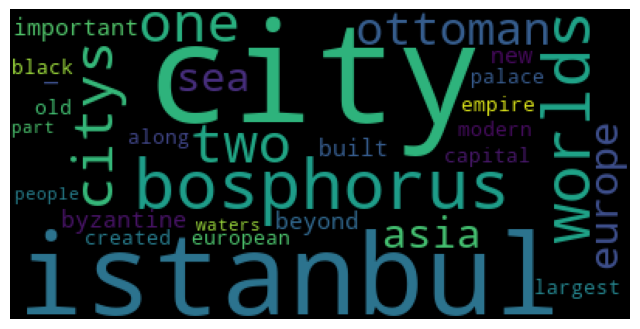

In [21]:
wtuples = goodctr.most_common(30)
wdict = dict(wtuples)

wordcloud = WordCloud()
wordcloud.fit_words(wdict)

fig=plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Exercise

Add Porter stemming to the previous exercise

In [22]:
contents = [c for c in contents if c not in string.punctuation]
contents = ''.join(contents)
words = contents.split()
words = [w.lower() for w in words]
goodwords = [w for w in words if w not in stopwords.words('english')]
stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in goodwords]
goodctr = Counter(stemmed)
print(goodctr.most_common(10))

[('citi', 19), ('istanbul', 9), ('world', 9), ('bosphoru', 8), ('one', 7), ('ottoman', 6), ('two', 5), ('sea', 5), ('europ', 4), ('asia', 4)]


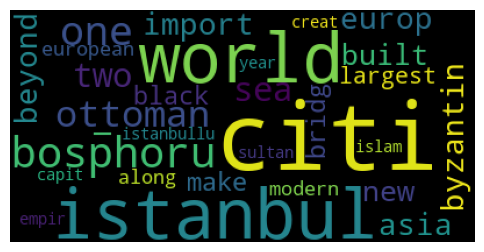

In [23]:
wtuples = goodctr.most_common(30)
wdict = dict(wtuples)

wordcloud = WordCloud()
wordcloud.fit_words(wdict)

fig=plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

You can play around with the list of stop words to remove things like "important" (stemmed as "import") and others to really get the key words to pop out. There is a technique to automatically damp down common English words called [TFIDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), which we will learn about soon in this class.

## Converting non-ASCII char

We should clean up the text extracted from the HTML so that the non-ASCII characters are stripped or converted.

In [24]:
text = "I need ¢ and £ and ¥"
print(text)
text = [c for c in text if ord(c)<=127]
text = ''.join(text)
print(text)

I need ¢ and £ and ¥
I need  and  and 


## Summary

Text files are an unstructured data source that we typically represent as a bag of words. A bag of words representation is a set of associations mapping words to their frequency or count. We typically use a dictionary data structure for bag of words because dictionary lookup is extremely efficient, versus linearly scanning an entire list of associations. We used word clouds to visualize the relative frequency of words in a document. 

The data structures and techniques described in this lecture-lab form the basis of natural language processing (NLP).